<a href="https://colab.research.google.com/github/stbalaji/AIForBusiness/blob/main/AICH_M4_GenAI_BuildingAQnABot_Reddit_Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ask me anything Bot !
Q&A Bot using Reddit data Read data from

Reddit is a popular forum for Communities, Topics, Discussions
*   Reddit is a network of communities based on people’s interests.
*   Each of these communities is called a subreddit.
*   Users can subscribe to multiple subreddits to post, comment and interact with them.

#PRAW : Python Reddit API Wrapper

# Pre-requsities for Using Reddit API
We need to do certain basic setup activities before using PRAW.

a) Create a login / Login to Reddit if you already have an account.

a) Go to https://reddit.com/prefs/apps
b) The Create an Application - Look at the Screen Shot below. This should help you create one for yourselves.

c) Then note down the Secret Id, Client Id, User  Name (Name) etc.
and the redirect_uri.

d) Use these in the API call : praw.Reddit()



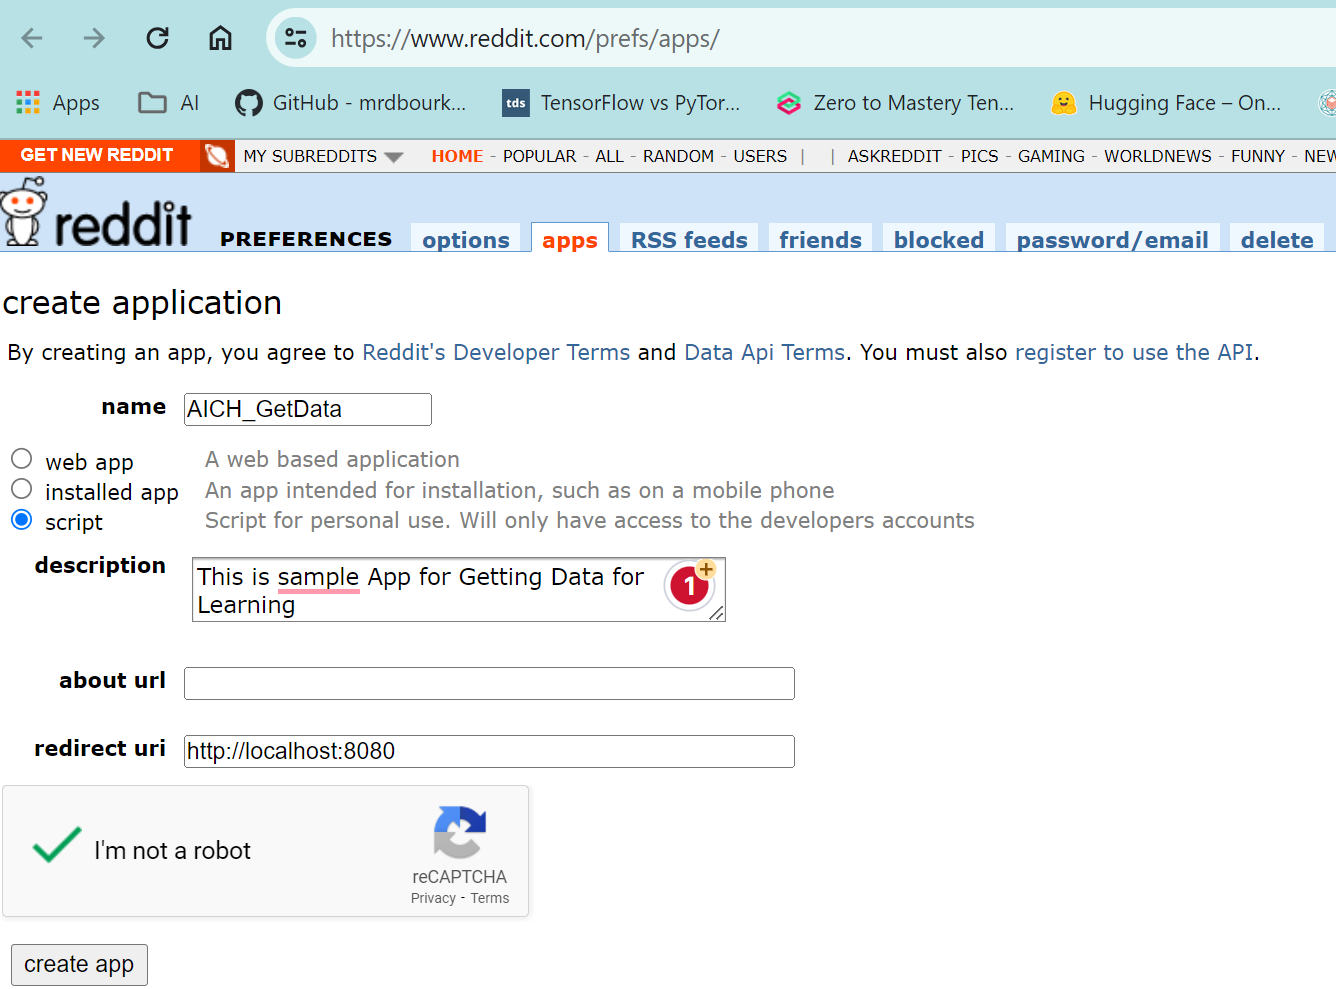

In [3]:
import warnings
warnings.filterwarnings("ignore")
!pip install PRAW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.6 MB/s eta 0:00:00


In [4]:
import praw
import pandas as pd

In [5]:
reddit = praw.Reddit(client_id='6AVD2dTdZMehs5MH4cqDVA',
                    client_secret='neNZXd68owLR7BS0czGqyTLjkDMZjg',
                    redirect_uri="http://localhost:8080",
                    user_agent='AICH_GetData',
                    check_for_async=False)

In [6]:
print(reddit.read_only)

True


## Step 2 : Quick Test
### Try to read a sample community like Machine Learning

## Look at API Documentation here
 https://praw.readthedocs.io/en/stable/getting_started/quick_start.html

In [7]:
v_community_Name = "DataScience"
subreddit = reddit.subreddit(v_community_Name)

# display the subreddit name
print(subreddit.display_name)

# display the subreddit title
print(subreddit.title)

# display the subreddit description
print(subreddit.description)

DataScience
Data Science



In [8]:
def fn_get_top_posts(p_reddit, subreddit_list='MachineLearning', limit=1000, time_filter='all'):

    posts = p_reddit.subreddit(subreddit_list).top(time_filter=time_filter, limit=limit)

    # Initialize post dataframe
    posts_df = []

    for post in posts:
        posts_df.append({'post_id': post.id,
                        'subreddit': post.subreddit,
                        'created_utc': post.created_utc,
                        'selftext': post.selftext,
                        'post_url': post.url,
                        'post_title': post.title,
                        'link_flair_text': post.link_flair_text,
                        'score': post.score,
                        'num_comments': post.num_comments,
                        'upvote_ratio': post.upvote_ratio
                        })
    return pd.DataFrame(posts_df)

### Pull Posts or Submissions from Few Popular Communities.

In [9]:
for submission in reddit.subreddit("learnpython").hot(limit=10):
    # print(submission.title)
    print([submission])  # Look at the Submission attributes

[Submission(id='196uerw')]
[Submission(id='19bs7wr')]
[Submission(id='19by4ru')]
[Submission(id='19bxyge')]
[Submission(id='19blk5h')]
[Submission(id='19c0ljk')]
[Submission(id='19brsrp')]
[Submission(id='19bwsty')]
[Submission(id='19c03rv')]
[Submission(id='19c02rk')]


In [10]:
posts_df = fn_get_top_posts(reddit, subreddit_list='MachineLearning+artificial+datascience', limit=3000, time_filter='all')
posts_df.to_csv('DS_ML_AI_posts.csv', header=True, index=False)
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8125,193,0.99
1,kuc6tz,MachineLearning,1.610275e+09,,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6087,135,0.98
2,g7nfvb,MachineLearning,1.587789e+09,,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4831,109,0.97
3,lui92h,MachineLearning,1.614525e+09,,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4769,231,0.97
4,ohxnts,MachineLearning,1.625977e+09,,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4740,232,0.96
...,...,...,...,...,...,...,...,...,...,...
2980,18skzb2,artificial,1.703738e+09,I just read the post asking when AI will repla...,https://www.reddit.com/r/artificial/comments/1...,Is it possible that the internet might end up ...,Discussion,99,95,0.87
2981,14cj2rz,artificial,1.687091e+09,,https://monkeymanweb.com,Adobe Generative Layer fill album covers,AI Art,97,9,0.91
2982,11ijczq,artificial,1.677979e+09,,https://i.redd.it/bofkn8z65vla1.png,AI Cyber Woman,Research,100,9,0.71
2983,10jphdp,artificial,1.674513e+09,,https://i.redd.it/e4f1ytvgcvda1.png,Act as a salesman! You absolutely need to sell...,Discussion,96,10,0.93


# Get Comments from Some of the Posts to test

In [11]:
submission = reddit.submission("lui92h")

submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)

This seems like the next museum gimmick where you have an AR app, you point it to a photo and you get the person telling you their life story
Alan Turing
Does that mean we're supposed to find and share the link? Come on, op....
I used some photos of my father and I'm speechless. He passed away when I was just a few months old, 29y ago. This is the first time I see him in motion, blinking, smiling... Thank you so much for this. ❤️
[cursed_cristiano_ronaldo_statue.mp4](https://streamable.com/rpxeuf)
This feels scary but I would love to give all my old pictures a spin.
https://www.myheritage.es/deep-nostalgia
Just a warning, they will use it for porn
anyone know if github code exists for this? i would be curious to experiment with it
I love it when these things [break](https://imgur.com/a/bDISWZW) in the most spectacular and horrific of ways.
Harry Potter feels

Edit : Context here was that Harry Potter universe has similar moving pictures
[deleted]
Sorry but not any link
where is the lin

# Get all the Comments
# The following Code may take sometime to Run

In [12]:
## Ideally We would try to pull comments from couple of popular posts.
## However Reddit processing takes time. So limiting to One topic or one topic at a time.
# posts_df = fn_get_top_posts(reddit, subreddit_list='MachineLearning+artificial+datascience', limit=3000, time_filter='all')
posts_df = fn_get_top_posts(reddit, subreddit_list='MachineLearning', limit=3000, time_filter='all')
posts_df.to_csv('DS_ML_AI_posts_MachineLearning.csv', header=True, index=False)
posts_df

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,8125,193,0.99
1,kuc6tz,MachineLearning,1.610275e+09,,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,6088,135,0.98
2,g7nfvb,MachineLearning,1.587789e+09,,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4834,109,0.97
3,lui92h,MachineLearning,1.614525e+09,,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4768,231,0.97
4,ohxnts,MachineLearning,1.625977e+09,,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4742,232,0.96
...,...,...,...,...,...,...,...,...,...,...
992,axdirb,MachineLearning,1.551740e+09,Imagine that you trained your super accurate m...,https://www.reddit.com/r/MachineLearning/comme...,[P] Ever wondered how to use your trained skle...,Project,347,53,0.97
993,iuc2yg,MachineLearning,1.600316e+09,The NumPy [paper](https://www.nature.com/artic...,https://www.reddit.com/r/MachineLearning/comme...,[R] Array programming with NumPy,Research,347,74,0.97
994,bhenys,MachineLearning,1.556231e+09,New article written by Andrej Karpathy distill...,https://www.reddit.com/r/MachineLearning/comme...,[D] A Recipe for Training Neural Networks,Discussion,345,17,0.97
995,8lm5f0,MachineLearning,1.527103e+09,,https://youtu.be/cnquEovq1I4,[R] AI Taught to Synthesize Materials,Research,340,38,0.95


In [ ]:
# Get comments on all posts
comments_list = []

for post_id in posts_df['post_id']:
    submission = reddit.submission(post_id)   # Loop through all the Post_Ids

    submission.comments.replace_more(limit=100)  #Limiting to 100 for learning purpose.
    for comment in submission.comments.list():
        comments_list.append({'post_id': post_id, 'comment': comment.body})

# creating a dataframe
comments_df = pd.DataFrame(comments_list)
comments_df.to_csv('DS_ML_AI_Comments_MachineLearning.csv', header=True, index=False)
comments_df

## Process Comments from Data

In [ ]:
posts_df = fn_get_top_posts(reddit, subreddit_list='artificial', limit=3000, time_filter='all')
posts_df.to_csv('DS_ML_AI_posts_MachineLearning.csv', header=True, index=False)
posts_df

# Get comments on all posts
comments_list = []
for post_id in posts_df['post_id']:
    submission = reddit.submission(post_id)   # Loop through all the Post_Ids

    submission.comments.replace_more(limit=100)  #Limiting to 100 for learning purpose.
    for comment in submission.comments.list():
        comments_list.append({'post_id': post_id, 'comment': comment.body})

# creating a dataframe
comments_df = pd.DataFrame(comments_list)
comments_df.to_csv('DS_ML_AI_Comments_Artificial.csv', header=True, index=False)
comments_df